<!--NAVIGATION-->
< [比较，遮盖和布尔逻辑](02.06-Boolean-Arrays-and-Masks.ipynb) | [目录](Index.ipynb) | [数组排序](02.08-Sorting.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/02.07-Fancy-Indexing.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Fancy Indexing

# 高级索引

> In the previous sections, we saw how to access and modify portions of arrays using simple indices (e.g., ``arr[0]``), slices (e.g., ``arr[:5]``), and Boolean masks (e.g., ``arr[arr > 0]``).
In this section, we'll look at another style of array indexing, known as *fancy indexing*.
Fancy indexing is like the simple indexing we've already seen, but we pass arrays of indices in place of single scalars.
This allows us to very quickly access and modify complicated subsets of an array's values.

在前面的小節中，我們學習瞭如何獲取和修改數組的元素或部分元素，我們可以通過簡單索引（例如`arr[0]`），切片（例如`arr[:5]`）和布爾遮蓋（例如`arr[arr > 0]`）來實現。本節來介紹另外一種數組索引的方式，被稱為*高級索引*。高級索引語法上和前面我們學習到的簡單索引很像，區別只是它不是傳遞標量參數作為索引值，而是傳遞數組參數作為索引值。它能讓我們很迅速的獲取和修改複雜數組或子數組的元素值。

### Basic Indexing
### 回顧索引

In [1]:
import numpy as np

x= np.array([[82,25,91],[46,-4,-56],[72,-5,14],[34,57,88]]) #create 2D array
x

array([[ 82,  25,  91],
       [ 46,  -4, -56],
       [ 72,  -5,  14],
       [ 34,  57,  88]])

In [2]:
#access an element at specific row and column
x[2,1]

-5

In [3]:
#access all elements of a specific row
x[1,:]

array([ 46,  -4, -56])

In [4]:
#alternative access of all elements of a specific row
print(x[1])
print(x[1].shape)

[ 46  -4 -56]
(3,)


In [5]:
#index access using list and pairwise row-col indices
x[[0,3,1],[1,2,1]]

array([25, 88, -4])

In [6]:
#index access using list
x[1:3,[0,2]] 

array([[ 46, -56],
       [ 72,  14]])

In [7]:
x

array([[ 82,  25,  91],
       [ 46,  -4, -56],
       [ 72,  -5,  14],
       [ 34,  57,  88]])

In [8]:
x[2,1]= -45
x

array([[ 82,  25,  91],
       [ 46,  -4, -56],
       [ 72, -45,  14],
       [ 34,  57,  88]])

In [9]:
#modify set of elements in an array
x[:,1] =[75,141,220,500]
x

array([[ 82,  75,  91],
       [ 46, 141, -56],
       [ 72, 220,  14],
       [ 34, 500,  88]])

In [10]:
#modify set of elements in an array
x[:,1] = 300
x

array([[ 82, 300,  91],
       [ 46, 300, -56],
       [ 72, 300,  14],
       [ 34, 300,  88]])

In [11]:
#modify elements using pairwise col-row indices
x[[0,3,1],[1,2,1]]=[49,64,81]
x

array([[ 82,  49,  91],
       [ 46,  81, -56],
       [ 72, 300,  14],
       [ 34, 300,  64]])

### boolean indexing

In [12]:
x= np.array([[82,25,91],[46,-4,-56],[72,-5,14],[34,57,88]]) #create 2D array
x

array([[ 82,  25,  91],
       [ 46,  -4, -56],
       [ 72,  -5,  14],
       [ 34,  57,  88]])

In [13]:
x%2==0
#This boolean condition is also called as "mask"

array([[ True, False, False],
       [ True,  True,  True],
       [ True, False,  True],
       [ True, False,  True]])

In [14]:
x[x%2==0]

array([ 82,  46,  -4, -56,  72,  14,  34,  88])

In [15]:
x[2]>=12

array([ True, False,  True])

In [16]:
x[:,x[2]>=12]
#get all rows but restrict columns whose 2nd row index >=12

array([[ 82,  91],
       [ 46, -56],
       [ 72,  14],
       [ 34,  88]])

In [17]:
x

array([[ 82,  25,  91],
       [ 46,  -4, -56],
       [ 72,  -5,  14],
       [ 34,  57,  88]])

In [18]:
x[:,1]>=25

array([ True, False, False,  True])

In [19]:
x[x[:,1]>=25,:]
#get all columns but restrict rows whose 1st col index >=25

array([[82, 25, 91],
       [34, 57, 88]])

In [20]:
#combine multiple boolean condition
(x[:,1]>=25) | (x[:,2]<=0)

array([ True,  True, False,  True])

In [21]:
x[(x[:,1]>=25) | (x[:,2]<=0),:]

array([[ 82,  25,  91],
       [ 46,  -4, -56],
       [ 34,  57,  88]])

In [22]:
# Given a 1D array, negate all elements which are between 3 and 8..And reshape to 3x5 shape
a= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
a[(3 < a) & (a < 8)] *= -1
print(a)
reshaped_a = a.reshape(3,5)
print(reshaped_a)

[ 1  2  3 -4 -5 -6 -7  8  9 10 11 12 13 14 15]
[[ 1  2  3 -4 -5]
 [-6 -7  8  9 10]
 [11 12 13 14 15]]


##### Considering these numpy array of person names and corresponding arrays for their age and gender. Findout names Who’s at least 44 in age.?
```
names = np.array(["Dennis", "Dee", "Charlie", "Mac", "Frank"])
ages = np.array([43, 44, 43, 42, 74])
genders = np.array(['male', 'female', 'male', 'male', 'male'])
```

In [23]:
names = np.array(["Dennis", "Dee", "Charlie", "Mac", "Frank"])
ages = np.array([43, 44, 43, 42, 74])
genders = np.array(['male', 'female', 'male', 'male', 'male'])

name= names[(ages >= 44)]
print(name)

['Dee' 'Frank']


###### Based on above array. Which males are over 42?.

In [24]:
name= names[(ages > 42) & (genders == 'male')]
print(name)

['Dennis' 'Charlie' 'Frank']


###### Based on above array. Who’s a not a male or who is younger than 45? 

In [25]:
name= names[(ages < 45) & (genders != 'male')]
name

array(['Dee'], dtype='<U7')

##### Array View vs Copy

1. `Simple Indexing` examples: <br>
   a. Access entire row / column<br>
   b. Access range of rows / columns<br>

2. `Advanced Indexing` examples:<br>
    a. Boolean Indexing<br>
    b. Pairwise row / col indexing<br>

<u>Important Notes:</u>
1. `simple indexing` does not return copy of the original array and instead it just refers to the portion of same data in original array.
(i.e) If any changes is made to the subset array, then the parent array also gets changed.

2. But if `advanced indexing` like boolean indexing is used, it creates copy of the original array and changes made to the subset array will not affect the original array.

In [26]:
#example of how numpy array assignment works
orig= np.array([[30,25,12],[21,-5,8],[75,14,100],[50,92,700]])
print('orig')
print(orig)
y = orig
y[0,2] = -11111
print('orig after modification')
print(orig)

orig
[[ 30  25  12]
 [ 21  -5   8]
 [ 75  14 100]
 [ 50  92 700]]
orig after modification
[[    30     25 -11111]
 [    21     -5      8]
 [    75     14    100]
 [    50     92    700]]


In [27]:
#simple indexing and numpy view
orig= np.array([[30,25,12],[21,-5,8],[75,14,100],[50,92,700]]) 
print('orig')
print(orig)
new = orig[1:3]
print('new')
print(new)

orig
[[ 30  25  12]
 [ 21  -5   8]
 [ 75  14 100]
 [ 50  92 700]]
new
[[ 21  -5   8]
 [ 75  14 100]]


In [28]:
print('orig')
print(orig)
new[1,2] = 5000

print('new')
print(new)
print()
print('orig after modification')
print(orig) #note that orig[2,2] also changed

orig
[[ 30  25  12]
 [ 21  -5   8]
 [ 75  14 100]
 [ 50  92 700]]
new
[[  21   -5    8]
 [  75   14 5000]]

orig after modification
[[  30   25   12]
 [  21   -5    8]
 [  75   14 5000]
 [  50   92  700]]


In [29]:
#simple indexing with copy
orig= np.array([[30,25,12],[21,-5,8],[75,14,100],[50,92,700]]) 
print('orig')
print(orig)

orig
[[ 30  25  12]
 [ 21  -5   8]
 [ 75  14 100]
 [ 50  92 700]]


In [30]:
new = orig[1:3].copy() # use copy to create new array
new[1,2] =5000

print('new')
print(new)
print()
print('orig after modification')
print(orig) #note that orig has not changed now

new
[[  21   -5    8]
 [  75   14 5000]]

orig after modification
[[ 30  25  12]
 [ 21  -5   8]
 [ 75  14 100]
 [ 50  92 700]]


In [31]:
#advanced indexing using pairwise row, col indexing
orig= np.array([[30,25,12],[21,-5,8],[75,14,100],[50,92,700]]) #create 2D array
new = orig[[0,3,1],[2,0,1]]
print('new')
print(new)

new
[12 50 -5]


In [32]:
new[2] =5000

print()
print(new)
print()
print('orig after modification')
print(orig)


[  12   50 5000]

orig after modification
[[ 30  25  12]
 [ 21  -5   8]
 [ 75  14 100]
 [ 50  92 700]]


In [33]:
#advanced indexing using boolean filter
orig= np.array([[30,25,12],[21,-5,8],[75,14,100],[50,92,700]]) 
new = orig[orig[:,1] >=25]
print()
print(new)


[[ 30  25  12]
 [ 50  92 700]]


In [34]:
new[1,2] =5000

print('new')
print(new)
print()
print('orig after modification')
print(orig)

new
[[  30   25   12]
 [  50   92 5000]]

orig after modification
[[ 30  25  12]
 [ 21  -5   8]
 [ 75  14 100]
 [ 50  92 700]]


In [35]:
#how to modify the original array with boolean indexing
orig[orig[:,1] >=25] += 100
print(orig)

[[130 125 112]
 [ 21  -5   8]
 [ 75  14 100]
 [150 192 800]]


## Exploring Fancy Indexing

## 初探高級索引

> Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once.
For example, consider the following array:

高級索引在概念層面非常簡單：傳遞一個數組作為索引值參數，使得用戶能一次性的獲取或修改多個數組元素值。例如下面的數組：

In [36]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [37]:
[x[3], x[7], x[2]]  # method1

[71, 86, 14]

In [38]:
ind = [3, 7, 4]    #method2
x[ind]

array([71, 86, 60])

> When using fancy indexing, the shape of the result reflects the shape of the *index arrays* rather than the shape of the *array being indexed*:

當使用高級索引時，結果數組的形狀取決於*索引數組*的形狀而不是*被索引數組*的形狀：

In [39]:
ind = np.array([[3, 7],
                [4, 5]]) # 索引數組是一個2x2數組，結果也將會是一個2x2數組
x[ind]

array([[71, 86],
       [60, 20]])

In [40]:
X = np.arange(12).reshape((3, 4))  #multiple dimensions.
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [41]:
row = np.array([0, 1, 2])  #row
col = np.array([2, 1, 3])  #col
X[row, col]

array([ 2,  5, 11])

> Notice that the first value in the result is ``X[0, 2]``, the second is ``X[1, 1]``, and the third is ``X[2, 3]``.
The pairing of indices in fancy indexing follows all the broadcasting rules that were mentioned in [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb).
So, for example, if we combine a column vector and a row vector within the indices, we get a two-dimensional result:

結果中的第一個值是`x[0, 2]`，第二個值是`x[1, 1]`，第三個值是`x[2, 3]`。高級索引的多個維度組合方式也遵守廣播的規則，請查閱[在數組上計算：廣播](02.05-Computation-on-arrays-broadcasting.ipynb)。因此，如果我們在上面的行索引數組中增加一個維度，結果將變成一個二維數組：

In [42]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [43]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

> It is always important to remember with fancy indexing that the return value reflects the *broadcasted shape of the indices*, rather than the shape of the array being indexed.

記住高級索引結果的形狀是*索引數組廣播後的形狀*而不是被索引數組形狀，這點非常重要。

## Combined Indexing

## 组合索引

In [44]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [45]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [46]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

> And we can combine fancy indexing with masking: All of these indexing options combined lead to a very flexible set of operations for accessing and modifying array values.

還可以將高級索引和遮蓋進行組合：所有這些索引操作可以提供用戶非常靈活的方式來獲取和修改數組中的數據。

In [47]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Example: Selecting Random Points

## 例子：選擇隨機點

> One common use of fancy indexing is the selection of subsets of rows from a matrix.
For example, we might have an $N$ by $D$ matrix representing $N$ points in $D$ dimensions, such as the following points drawn from a two-dimensional normal distribution:

高級索引的一個通用應用場景就是從一個矩陣的行中選取子數據集。例如，我們有一個$N \times D$的矩陣，代表著一個$D$維平面上有$N$個點，例如下面的二維正態分佈的點集合：

In [48]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

> Using the plotting tools we will discuss in [Introduction to Matplotlib](04.00-Introduction-To-Matplotlib.ipynb), we can visualize these points as a scatter-plot:

使用我們會在[第四章](04.00-Introduction-To-Matplotlib.ipynb)詳細介紹的Matplotlib工具，我們可以在散點圖上繪製這些點：

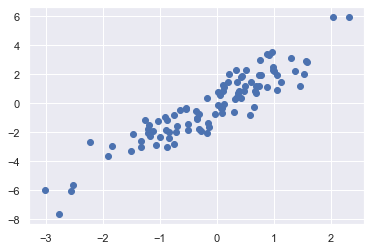

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() 

plt.scatter(X[:, 0], X[:, 1]);

> Let's use fancy indexing to select 20 random points. We'll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion of the original array:

下面我們使用高級索引來選擇20個隨機點。方法是先創建一個索引數組，裡面的索引值是沒有重複的，然後使用這個索引數組來選擇點：

In [50]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([14, 58, 37, 15,  0, 27, 41, 32, 90, 93, 24, 56, 17, 47, 81, 35, 72,
       38, 97, 69])

In [51]:
selection = X[indices]  # 使用高级索引
selection.shape

(20, 2)

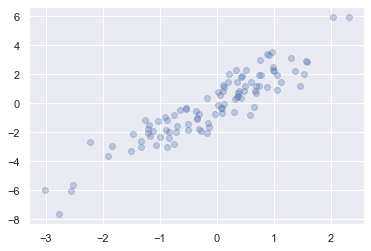

In [52]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

> This sort of strategy is often used to quickly partition datasets, as is often needed in train/test splitting for validation of statistical models (see [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb)), and in sampling approaches to answering statistical questions.

這種策略經常用來劃分數據集，比如用來驗證統計模型正確性時需要的訓練集和測試集劃分（參見[超參數及模型驗證](05.03-Hyperparameters-and-Model-Validation.ipynb)），還有就是在回答統計問題時進行取樣抽象。

## Modifying Values with Fancy Indexing

## 使用高級索引修改數據

> Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array.
For example, imagine we have an array of indices and we'd like to set the corresponding items in an array to some value:

前面我們看到高級索引能夠被用來獲取一個數組的部分數據，實際上它還能用來修改選中部分的數據。例如，我們手頭有一個索引的數組，我們想將這些索引上的數據修改為某個值：

In [53]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [54]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


> Notice, though, that repeated indices with these operations can cause some potentially unexpected results. Consider the following:

請注意下，如果索引數組中有重複的元素的話，這種修改操作可能會導致一個潛在的意料之外的結果。例如：

In [55]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


> Where did the 4 go? The result of this operation is to first assign ``x[0] = 4``, followed by ``x[0] = 6``.
The result, of course, is that ``x[0]`` contains the value 6.

4跑到哪裡去了呢？這個操作首先賦值`x[0] = 4`，然後賦值`x[0] = 6`，因此最後`x[0]`的值是6。

In [56]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

> You might expect that ``x[3]`` would contain the value 2, and ``x[4]`` would contain the value 3, as this is how many times each index is repeated. Why is this not the case?
Conceptually, this is because ``x[i] += 1`` is meant as a shorthand of ``x[i] = x[i] + 1``. ``x[i] + 1`` is evaluated, and then the result is assigned to the indices in x.
With this in mind, it is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results.

> So what if you want the other behavior where the operation is repeated? For this, you can use the ``at()`` method of ufuncs (available since NumPy 1.8), and do the following:

我們期望的結果可能是`x[3]`的值是2，而`x[4]`的值是3，因為這兩個元素都多次執行了加法操作。但是為何結果不是呢？這是因為`x[i] += 1`是操作`x[i] = x[i] + 1`的簡寫，而`x[i] + 1`表達式的值已經計算好了，然後才被賦值給`x[i]`。因此，上面的操作不會被擴展為重複的運算，而是一次的賦值操作，造成了這種難以理解的結果。

如果我們真的需要這種重複的操作怎麼辦？對此，NumPy（版本1.8以上）提供了`at()`ufunc方法可以滿足這個目的，如下：

In [57]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


> The ``at()`` method does an in-place application of the given operator at the specified indices (here, ``i``) with the specified value (here, 1).
Another method that is similar in spirit is the ``reduceat()`` method of ufuncs, which you can read about in the NumPy documentation.

`at()`方法不會預先計算表達式的值，而是每次運算時實時得到，方法在一個數組`x`中取得特定索引`i`，然後將其取得的值與最後一個參數`1`進行相應計算，這裡是加法`add`。還有一個類似的方法是`reduceat()`方法，你可以從NumPy的文檔中閱讀它的說明。

## Example: Binning Data

## 例子：數據分組

> You can use these ideas to efficiently bin data to create a histogram by hand.
For example, imagine we have 1,000 values and would like to quickly find where they fall within an array of bins.
We could compute it using ``ufunc.at`` like this:

你可以使用上面的方法對數據進行高效分組，用於定義自己的直方圖。例如，設想我們有1000個值，我們想將它們分別放入各個不同的數組分組中。我們可以使用`at`函數，例如：

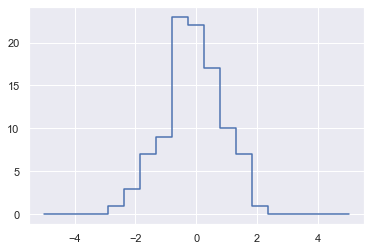

In [58]:
np.random.seed(42)
x = np.random.randn(100) # 獲得一個一維100個標準正態分佈值

# 得到一個自定義的數據分組，區間-5至5平均取20個點，每個區間為一個數據分組
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins) # counts是x數值落入區間的計數

# 使用searchsorted，得到x每個元素在bins中落入的區間序號
i = np.searchsorted(bins, x)

# 使用at和add，對x元素在每個區間的元素個數進行計算
np.add.at(counts, i, 1)
plt.plot(bins, counts, ds='steps');

> Of course, it would be silly to have to do this each time you want to plot a histogram.
This is why Matplotlib provides the ``plt.hist()`` routine, which does the same in a single line:

當然，如果每次要畫直方圖的時候，都要經過這麼複雜的計算，很不方便。這也就是為什麼Matplotlib提供了`plt.hist()`方法的原因，可以用一行代碼完成上面操作：

```python
plt.hist(x, bins, histtype='step');
```

> This function will create a nearly identical plot to the one seen here.
To compute the binning, ``matplotlib`` uses the ``np.histogram`` function, which does a very similar computation to what we did before. Let's compare the two here:

這個函數會創建一個和上圖基本完全一樣的圖形。 Matplotlib使用`np.histogram`函數來計算數據分組，這個函數進行的計算和我們上面的代碼非常接近。我們比較一下這兩個方法：

In [59]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
18.4 µs ± 394 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Custom routine:
11.3 µs ± 119 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


> Our own one-line algorithm is several times faster than the optimized algorithm in NumPy! How can this be?
If you dig into the ``np.histogram`` source code (you can do this in IPython by typing ``np.histogram??``), you'll see that it's quite a bit more involved than the simple search-and-count that we've done; this is because NumPy's algorithm is more flexible, and particularly is designed for better performance when the number of data points becomes large:

我們自己寫的一行代碼比NumPy優化的算法要快出許多，這是因為什麼？如果你深入到`np.histogram`函數的源代碼進行閱讀（你可以通過在IPython中輸入`np.histogram??`來查閱）的時候，你會發現函數除了搜索和計數之外，還做了其他很多工作；這是因為NumPy的函數要更加靈活，而且當數據量變大的時候能夠提供更好的性能：

In [60]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
67.4 ms ± 934 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
93.6 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


> What this comparison shows is that algorithmic efficiency is almost never a simple question. An algorithm efficient for large datasets will not always be the best choice for small datasets, and vice versa (see [Big-O Notation](02.08-Sorting.ipynb#Aside:-Big-O-Notation)).
But the advantage of coding this algorithm yourself is that with an understanding of these basic methods, you could use these building blocks to extend this to do some very interesting custom behaviors.
The key to efficiently using Python in data-intensive applications is knowing about general convenience routines like ``np.histogram`` and when they're appropriate, but also knowing how to make use of lower-level functionality when you need more pointed behavior.

上面的結果說明當涉及到算法的性能時，永遠不可能是一個簡單的問題。對於大數據集來說一個很高效的算法，並不一定也適用於小數據集，反之亦然（參見[大O複雜度](02.08-Sorting.ipynb#Aside:-Big-O-Notation)）。我們這裡使用自己的代碼實現這個算法，目的是理解上面的基本函數，後續讀者可以使用這些函數構建自己定義的各種功能。在數據科學應用中使用Python編寫代碼的關鍵在於，你能掌握NumPy提供的很方便的函數如`np.histogram`，你也能知道什麼情況下適合使用它們，當需要更加定制的功能時你還能使用底層的函數自己實現相應的算法。

<!--NAVIGATION-->
< [比较，遮盖和布尔逻辑](02.06-Boolean-Arrays-and-Masks.ipynb) | [目录](Index.ipynb) | [数组排序](02.08-Sorting.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/02.07-Fancy-Indexing.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


**Using Boolean Mask**

In [61]:
a = np.random.randint(0, 20, 15)
a

array([ 4, 13,  5, 19,  3, 13, 12, 18, 12,  4,  7, 14, 18,  3,  0])

In [62]:
### To writien a only even number we can used this operation 
mask = (a % 2 == 0)         

In [63]:
extract_from_a = a[mask]
extract_from_a

array([ 4, 12, 18, 12,  4, 14, 18,  0])

**Indexing with a mask can be very useful to assign a new value to a sub-array:**

In [64]:
a[mask] = -1
a

array([-1, 13,  5, 19,  3, 13, -1, -1, -1, -1,  7, -1, -1,  3, -1])

**Indexing with an array of integers**

In [65]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [66]:
#Indexing can be done with an array of integers, where the same index is repeated several time:
a[[2, 3, 2, 4, 2]]

array([20, 30, 20, 40, 20])

In [67]:
# New values can be assigned 
a[[9, 7]] = -200
a

array([   0,   10,   20,   30,   40,   50,   60, -200,   80, -200])